# PROJETO 2 - SME0130 Redes Complexas
## João Pedro Ramos Belmiro - 9791148
## Matheus Aparecido do Carmo Alves - 9791114 

## IMPORTS

1. Caso tenha problemas com a importação do pacote seaborn, tente:

$ sudo pip install seaborn

2. Caso tenha problemas com a importação do pacote osmnx:

    a) verifique se este está previamente instalado; caso não esteja tente:

$ sudo pip install osmnx

    b) caso esteja tendo problemas com a importação do código libspatialindex_c, tente:

http://toblerity.org/rtree/install.html

    ou
                                
$ sudo apt-get install python-geopandas-doc

In [1]:
import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph

from numpy  import *
import numpy as np
np.random.seed(50)

import os

import osmnx as ox

from scipy.linalg import expm

import seaborn as sns

import pandas as pd

## LOADING NETWORKS

Caso esteja tendo problemas para carregar a rede celegansneural, verifique a bandeira <i>'multigraph 1'</i> no documento de dado <i>'.gml'</i>.

In [2]:
eroad = nx.Graph()
eroad = nx.read_edgelist('Networks/euroroad.txt',\
                         nodetype=int, comments='%')

hams = nx.Graph()
hams = nx.read_edgelist('Networks/out.petster-friendships-hamster-uniq',\
                        nodetype=int, comments='%')

elegans = nx.MultiGraph()
elegans = nx.read_gml('Networks/celegansneural.gml')
elegans = nx.Graph(elegans)

airport = nx.Graph()
airport = nx.read_edgelist("Networks/usairport.txt",\
                           nodetype=int, data=(('weight',int),))

## EXERCÍCIO 1

Para o primeiro exercício deste segundo projeto, é pedido para que sejam analisados as seguintes medidas de centralidade:

<ul>
    <li>(i) grau;</li>
    <li>(ii) número de cores (k-cores);</li>
    <li>(iii) closeness;</li>
    <li>(iv) betwenness;</li>
    <li>(v) eigenvector;</li>
    <li>(vi) page rank;</li>
    <li>(vii) acessibilidade via random-walk, e;</li>
    <li>(i) cummunicability;</li>
</ul>

As maiores correlações serão discutidas e os resultados serão interpretados.

Primeiramente, transformaremos todas as redes em redes não-direcionadas para análise:

In [3]:
eroad_u = eroad.to_undirected()

hams_u = hams.to_undirected()

elegans_u = elegans.to_undirected()
elegans_u = nx.convert_node_labels_to_integers(elegans_u, first_label=0)

airport_u = airport.to_undirected()

Após tranformação, iremos extrair a maior componente de cada redes para realizar as análises requisitadas.

In [4]:
eroad_cc = max(nx.connected_component_subgraphs(eroad_u), key=len)
hams_cc = max(nx.connected_component_subgraphs(hams_u), key=len)
elegans_cc = max(nx.connected_component_subgraphs(elegans_u), key=len)
airport_cc = max(nx.connected_component_subgraphs(airport_u), key=len)

### (i) Degree centrality

In [5]:
# Calculating the degree centrality
vk_eroad = dict(eroad_u.degree())
vk_eroad = list(vk_eroad.values())

vk_hams = dict(hams_u.degree())
vk_hams = list(vk_hams.values())

vk_elegans = dict(elegans_u.degree())
vk_elegans = list(vk_elegans.values())

vk_airport = dict(airport_u.degree())
vk_airport = list(vk_airport.values())

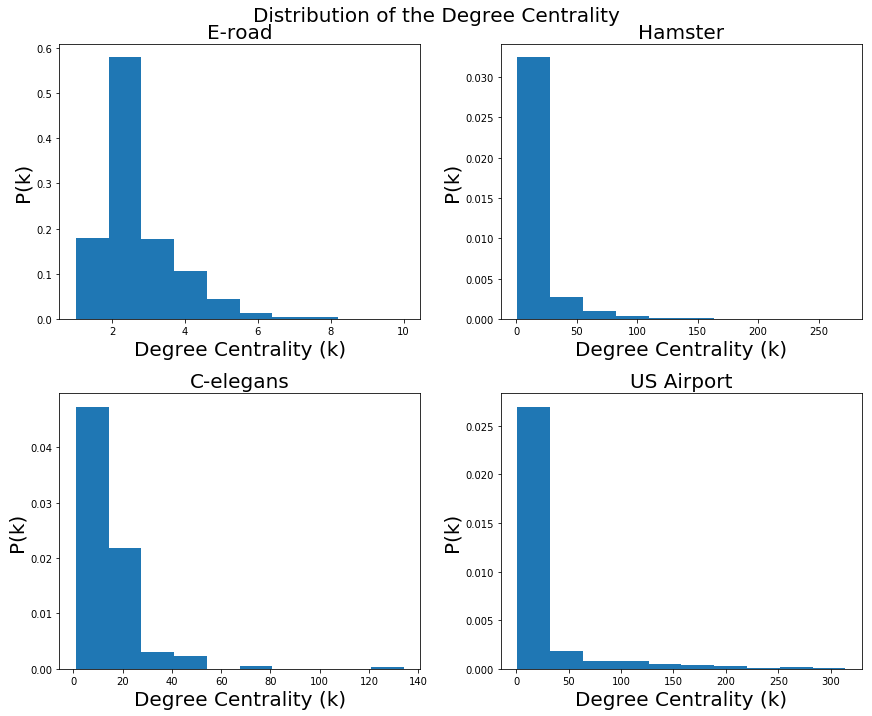

In [6]:
# Plotting the degree centrality results
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Degree Centrality", fontsize=20)

axs[0,0].hist(vk_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(k)", fontsize=20)
axs[0,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[0,1].hist(vk_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(k)", fontsize=20)
axs[0,1].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,0].hist(vk_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(k)", fontsize=20)
axs[1,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,1].hist(vk_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(k)", fontsize=20)
axs[1,1].set_xlabel("Degree Centrality (k)", fontsize=20)

plt.show(True)

Perceba...

### (ii) K-core centrality

Vamos agora calcular os K-core de cada rede

In [245]:
KC_eroad = dict(nx.core_number(eroad))
KC_eroad = list(KC_eroad.values())

KC_hams = dict(nx.core_number(hams))
KC_hams = list(KC_hams.values())

KC_elegans = dict(nx.core_number(elegans))
KC_elegans = list(KC_elegans.values())

KC_airport = dict(nx.core_number(airport))
KC_airport = list(KC_airport.values())

Vamos ver a distribuição dos k-core

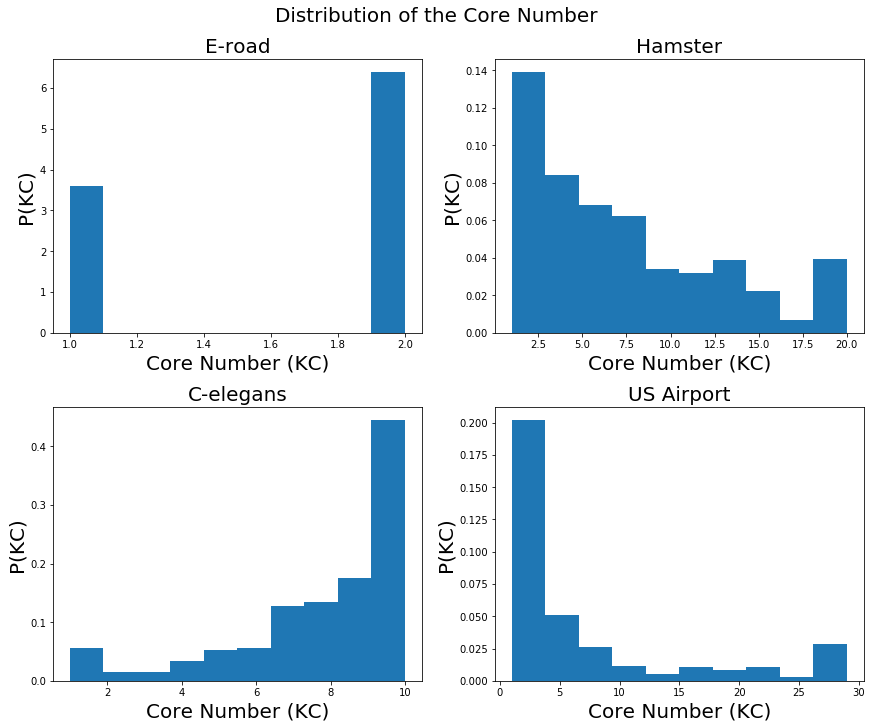

In [247]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Core Number", fontsize=20)

axs[0,0].hist(KC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(KC)", fontsize=20)
axs[0,0].set_xlabel("Core Number (KC)", fontsize=20)

axs[0,1].hist(KC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(KC)", fontsize=20)
axs[0,1].set_xlabel("Core Number (KC)", fontsize=20)

axs[1,0].hist(KC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(KC)", fontsize=20)
axs[1,0].set_xlabel("Core Number (KC)", fontsize=20)

axs[1,1].hist(KC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(KC)", fontsize=20)
axs[1,1].set_xlabel("Core Number (KC)", fontsize=20)

plt.show(True)

### (iii)Closeness Centrality

Vamos calcular o closeness centrality e em seguir exibi-los

In [223]:
CLC_eroad = dict(nx.closeness_centrality(eroad))
CLC_eroad = list(CLC_eroad.values())

CLC_hams = dict(nx.closeness_centrality(hams))
CLC_hams = list(CLC_hams.values())

CLC_elegans = dict(nx.closeness_centrality(elegans))
CLC_elegans = list(CLC_elegans.values())

CLC_airport = dict(nx.closeness_centrality(airport))
CLC_airport = list(CLC_airport.values())

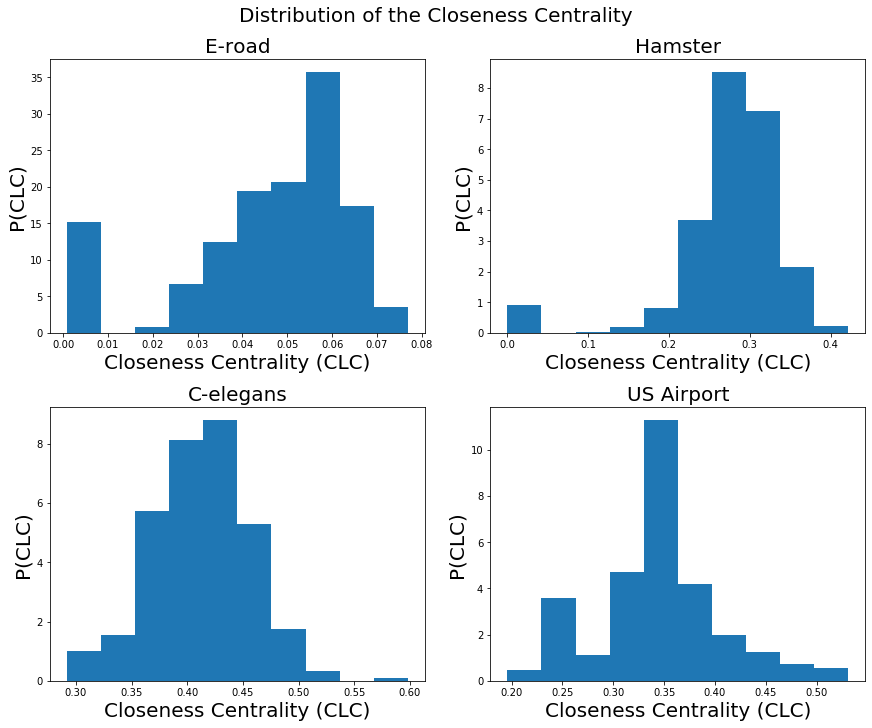

In [224]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Closeness Centrality", fontsize=20)

axs[0,0].hist(CLC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(CLC)", fontsize=20)
axs[0,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[0,1].hist(CLC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(CLC)", fontsize=20)
axs[0,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,0].hist(CLC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(CLC)", fontsize=20)
axs[1,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,1].hist(CLC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(CLC)", fontsize=20)
axs[1,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

plt.show(True)

### (iv)Betweenness Centrality

In [229]:
B_eroad = dict(nx.betweenness_centrality(eroad))
B_eroad = list(B_eroad.values())

B_hams = dict(nx.betweenness_centrality(hams))
B_hams = list(B_hams.values())

B_elegans = dict(nx.betweenness_centrality(elegans))
B_elegans = list(B_elegans.values())

B_airport = dict(nx.betweenness_centrality(airport))
B_airport = list(B_airport.values())

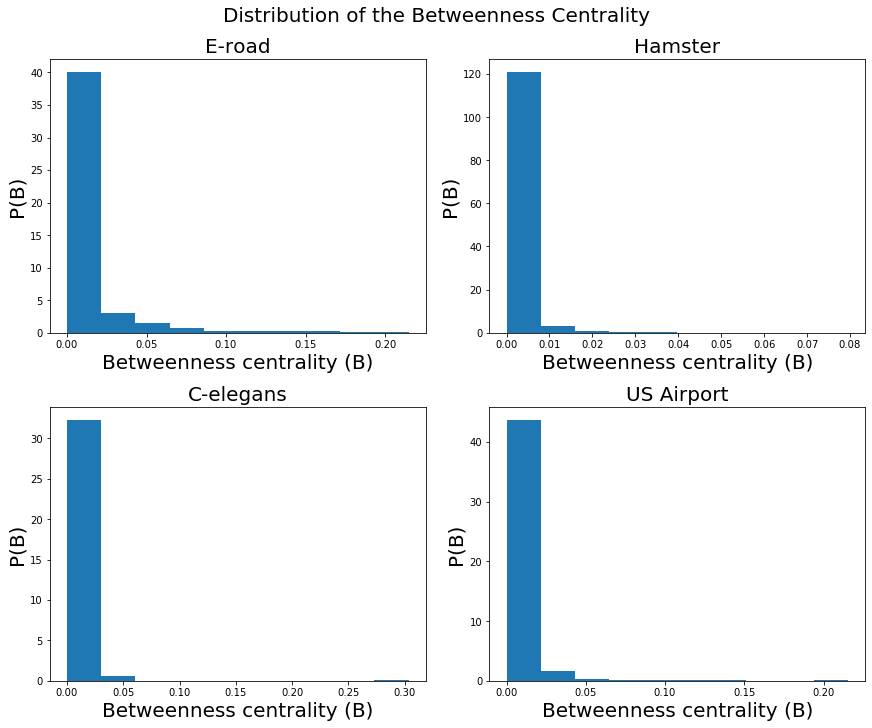

In [232]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Betweenness Centrality", fontsize=20)

axs[0,0].hist(B_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(B)", fontsize=20)
axs[0,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[0,1].hist(B_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(B)", fontsize=20)
axs[0,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,0].hist(B_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(B)", fontsize=20)
axs[1,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,1].hist(B_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(B)", fontsize=20)
axs[1,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

plt.show(True)

### (v)Eigenvector Centrality

In [248]:
EC_eroad = dict(nx.eigenvector_centrality(eroad, max_iter = 1000))
EC_eroad= list(EC_eroad.values())

EC_hams = dict(nx.eigenvector_centrality(hams, max_iter = 1000))
EC_hams= list(EC_hams.values())

EC_elegans = dict(nx.eigenvector_centrality(elegans, max_iter = 1000))
EC_elegans= list(EC_elegans.values())

EC_airport = dict(nx.eigenvector_centrality(airport, max_iter = 1000))
EC_airport= list(EC_airport.values())

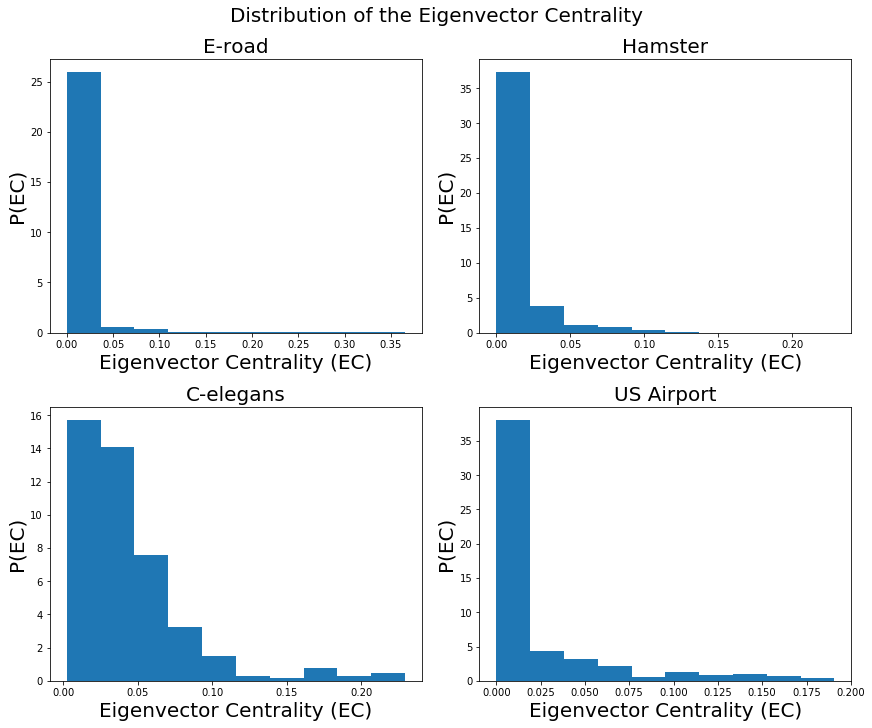

In [249]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Eigenvector Centrality", fontsize=20)

axs[0,0].hist(EC_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(EC)", fontsize=20)
axs[0,0].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

axs[0,1].hist(EC_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(EC)", fontsize=20)
axs[0,1].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

axs[1,0].hist(EC_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(EC)", fontsize=20)
axs[1,0].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

axs[1,1].hist(EC_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(EC)", fontsize=20)
axs[1,1].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

plt.show(True)

### (vi)Pagerank

In [250]:
PR_eroad = dict(nx.pagerank(eroad, alpha=0.85))
PR_eroad= list(PR_eroad.values())

PR_hams = dict(nx.pagerank(hams, alpha=0.85))
PR_hams= list(PR_hams.values())

PR_elegans = dict(nx.pagerank(elegans, alpha=0.85))
PR_elegans= list(PR_elegans.values())

PR_airport = dict(nx.pagerank(airport, alpha=0.85))
PR_airport= list(PR_airport.values())

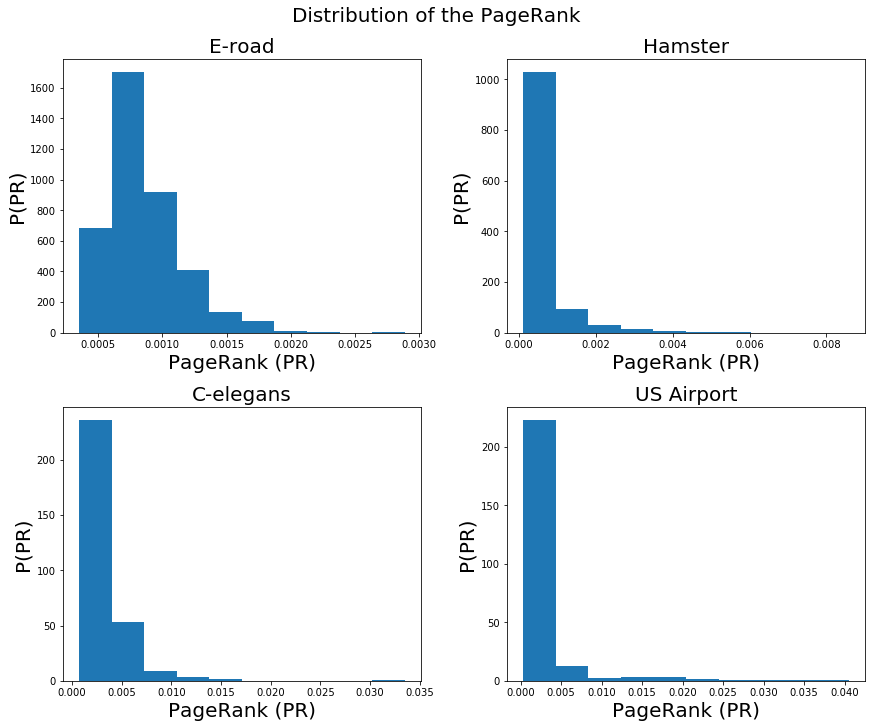

In [251]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the PageRank", fontsize=20)

axs[0,0].hist(PR_eroad, density=True)
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_ylabel("P(PR)", fontsize=20)
axs[0,0].set_xlabel("PageRank (PR)", fontsize=20)

axs[0,1].hist(PR_hams, density=True)
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_ylabel("P(PR)", fontsize=20)
axs[0,1].set_xlabel("PageRank (PR)", fontsize=20)

axs[1,0].hist(PR_elegans, density=True)
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_ylabel("P(PR)", fontsize=20)
axs[1,0].set_xlabel("PageRank (PR)", fontsize=20)

axs[1,1].hist(PR_airport, density=True)
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_ylabel("P(PR)", fontsize=20)
axs[1,1].set_xlabel("PageRank (PR)", fontsize=20)

plt.show(True)

### (vii)Random Walk Accessibility

### (viii)Communicability Centrality

In [240]:
CC_eroad = dict(nx.communicability_centrality(eroad))
CC_eroad = list(CC_eroad.values())

CC_hams = dict(nx.communicability_centrality(hams))
CC_hams= list(CC_hams.values())

CC_elegans = dict(nx.communicability_centrality(elegans))
CC_elegans = list(CC_elegans.values())

CC_airport = dict(nx.communicability_centrality(airport))
CC_airport = list(CC_airport.values())

AttributeError: module 'networkx' has no attribute 'communicability_centrality'

### Matriz de Correlação

In [252]:
df_eroad = pd.DataFrame({'K':vk_eroad,'CLC':CLC_eroad,'B':B_eroad,'EC':EC_eroad,'PR':PR_eroad})
df_hams = pd.DataFrame({'K':vk_hams,'CLC':CLC_hams,'B':B_hams,'EC':EC_hams,'PR':PR_hams})
df_elegans = pd.DataFrame({'K':vk_elegans,'CLC':CLC_elegans,'B':B_elegans,'EC':EC_elegans,'PR':PR_elegans})
df_airport = pd.DataFrame({'K':vk_airport,'CLC':CLC_airport,'B':B_airport,'EC':EC_airport,'PR':PR_airport})

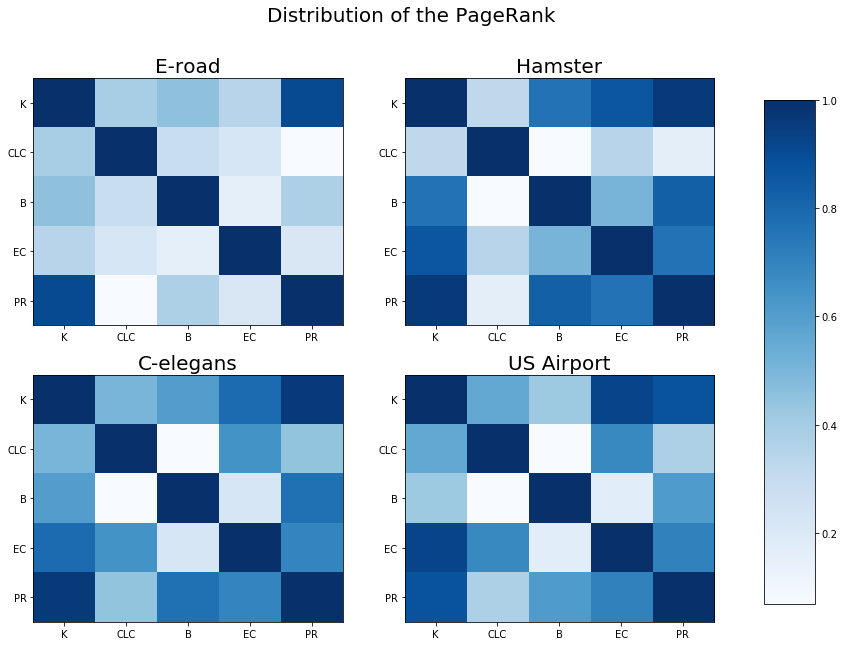

In [253]:
corr_eorad = df_eroad.corr()
corr_hams = df_hams.corr()
corr_elegans = df_elegans.corr()
corr_airport = df_airport.corr()

fig, axs = plt.subplots(2, 2, constrained_layout=False, figsize=(14,10))
fig.suptitle("Distribution of the PageRank", fontsize=20)

im = axs[0,0].imshow(corr_eorad, cmap='Blues', interpolation='none', aspect='auto')
axs[0,0].set_title("E-road", fontsize=20)
axs[0,0].set_xticks(np.arange(len(corr_eorad)))
axs[0,0].set_yticks(np.arange(len(corr_eorad)))
axs[0,0].set_xticklabels(corr_eorad.columns)
axs[0,0].set_yticklabels(labels);

axs[0,1].imshow(corr_hams, cmap='Blues', interpolation='none', aspect='auto')
axs[0,1].set_title("Hamster", fontsize=20)
axs[0,1].set_xticks(np.arange(len(corr_hams)))
axs[0,1].set_yticks(np.arange(len(corr_hams)))
axs[0,1].set_xticklabels(corr_hams.columns)
axs[0,1].set_yticklabels(labels);

axs[1,0].imshow(corr_elegans, cmap='Blues', interpolation='none', aspect='auto')
axs[1,0].set_title("C-elegans", fontsize=20)
axs[1,0].set_xticks(np.arange(len(corr_elegans)))
axs[1,0].set_yticks(np.arange(len(corr_elegans)))
axs[1,0].set_xticklabels(corr_elegans.columns)
axs[1,0].set_yticklabels(labels);

axs[1,1].imshow(corr_airport, cmap='Blues', interpolation='none', aspect='auto')
axs[1,1].set_title("US Airport", fontsize=20)
axs[1,1].set_xticks(np.arange(len(corr_airport)))
axs[1,1].set_yticks(np.arange(len(corr_airport)))
axs[1,1].set_xticklabels(corr_airport.columns)
axs[1,1].set_yticklabels(labels);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show(True)

[Voltar para o topo](#lista)

## <a id="2">EX2</a>

Foram escolhidos os mapas da cidade de Londres, a ilha de Manhattan, a cidade de Piedmont - CA dos EUA e a ilha de Hong Kong

In [208]:
London = ox.graph_from_place('City of London, UK', network_type='drive', which_result=2)

In [209]:
Manhattan = ox.graph_from_place('Manhattan Island, New York', network_type='drive')

In [210]:
Piedmont = ox.graph_from_place('Piedmont, California', network_type='drive')

In [211]:
Hong_Kong = ox.graph_from_place('Hong Kong Island', network_type='drive')

### (i) Degree Centrality

In [212]:
vk_London = dict(London.degree())
vk_London = list(vk_London.values())

vk_Man = dict(Manhattan.degree())
vk_Man = list(vk_Man.values())

vk_Pied = dict(Piedmont.degree())
vk_Pied = list(vk_Pied.values())

vk_Hong = dict(Hong_Kong.degree())
vk_Hong = list(vk_Hong.values())

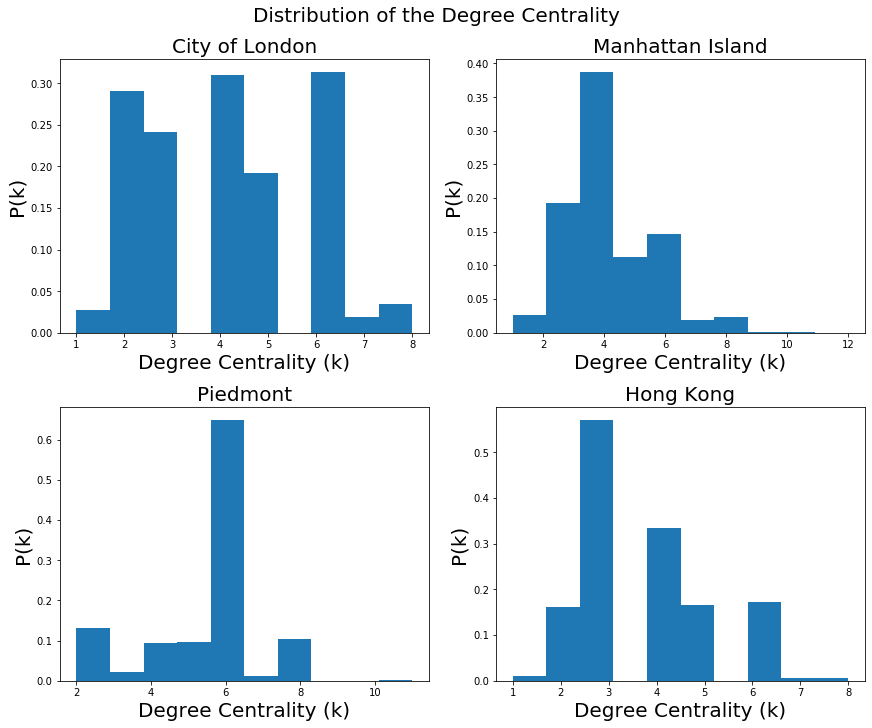

In [213]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Degree Centrality", fontsize=20)

axs[0,0].hist(vk_London, density=True)
axs[0,0].set_title("City of London", fontsize=20)
axs[0,0].set_ylabel("P(k)", fontsize=20)
axs[0,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[0,1].hist(vk_Man, density=True)
axs[0,1].set_title("Manhattan Island", fontsize=20)
axs[0,1].set_ylabel("P(k)", fontsize=20)
axs[0,1].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,0].hist(vk_Pied, density=True)
axs[1,0].set_title("Piedmont", fontsize=20)
axs[1,0].set_ylabel("P(k)", fontsize=20)
axs[1,0].set_xlabel("Degree Centrality (k)", fontsize=20)

axs[1,1].hist(vk_Hong, density=True)
axs[1,1].set_title("Hong Kong", fontsize=20)
axs[1,1].set_ylabel("P(k)", fontsize=20)
axs[1,1].set_xlabel("Degree Centrality (k)", fontsize=20)

plt.show(True)

### (ii) Closeness Centrality

In [218]:
CLC_London = dict(nx.closeness_centrality(London))
CLC_London = list(CLC_London.values())

CLC_Man = dict(nx.closeness_centrality(Manhattan))
CLC_Man = list(CLC_Man.values())

CLC_Pied = dict(nx.closeness_centrality(Piedmont))
CLC_Pied = list(CLC_Pied.values())

CLC_Hong = dict(nx.closeness_centrality(Hong_Kong))
CLC_Hong = list(CLC_Hong.values())

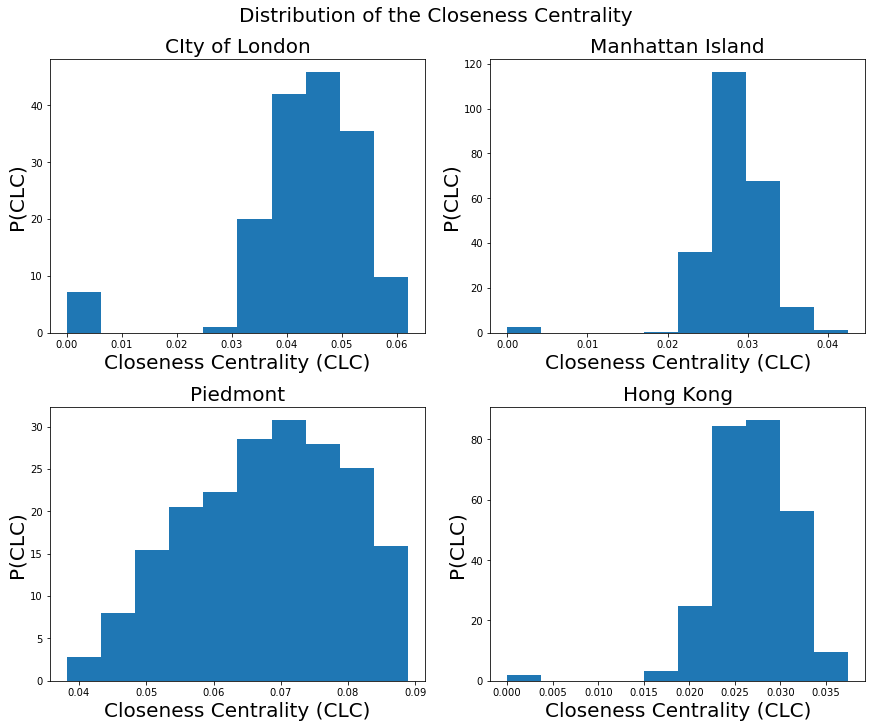

In [219]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Closeness Centrality", fontsize=20)

axs[0,0].hist(CLC_London, density=True)
axs[0,0].set_title("CIty of London", fontsize=20)
axs[0,0].set_ylabel("P(CLC)", fontsize=20)
axs[0,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[0,1].hist(CLC_Man, density=True)
axs[0,1].set_title("Manhattan Island", fontsize=20)
axs[0,1].set_ylabel("P(CLC)", fontsize=20)
axs[0,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,0].hist(CLC_Pied, density=True)
axs[1,0].set_title("Piedmont", fontsize=20)
axs[1,0].set_ylabel("P(CLC)", fontsize=20)
axs[1,0].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

axs[1,1].hist(CLC_Hong, density=True)
axs[1,1].set_title("Hong Kong", fontsize=20)
axs[1,1].set_ylabel("P(CLC)", fontsize=20)
axs[1,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

plt.show(True)

### (iii) Betweenness Centrality

In [216]:
B_London = dict(nx.betweenness_centrality(London))
B_London = list(B_London.values())

B_Man = dict(nx.betweenness_centrality(Manhattan))
B_Man = list(B_Man.values())

B_Pied = dict(nx.betweenness_centrality(Piedmont))
B_Pied = list(B_Pied.values())

B_Hong = dict(nx.betweenness_centrality(Hong_Kong))
B_Hong = list(B_Hong.values())

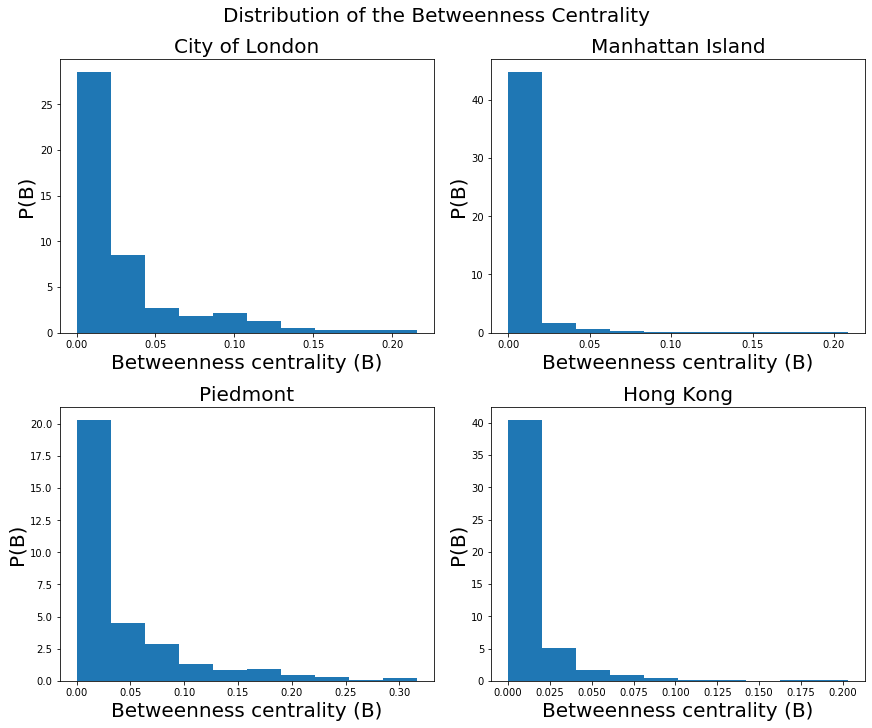

In [217]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
fig.suptitle("Distribution of the Betweenness Centrality", fontsize=20)

axs[0,0].hist(B_London, density=True)
axs[0,0].set_title("City of London", fontsize=20)
axs[0,0].set_ylabel("P(B)", fontsize=20)
axs[0,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[0,1].hist(B_Man, density=True)
axs[0,1].set_title("Manhattan Island", fontsize=20)
axs[0,1].set_ylabel("P(B)", fontsize=20)
axs[0,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,0].hist(B_Pied, density=True)
axs[1,0].set_title("Piedmont", fontsize=20)
axs[1,0].set_ylabel("P(B)", fontsize=20)
axs[1,0].set_xlabel("Betweenness centrality (B)", fontsize=20)

axs[1,1].hist(B_Hong, density=True)
axs[1,1].set_title("Hong Kong", fontsize=20)
axs[1,1].set_ylabel("P(B)", fontsize=20)
axs[1,1].set_xlabel("Betweenness centrality (B)", fontsize=20)

plt.show(True)

[Voltar para o topo](#lista)

## <a id="3">EX3</a>

Vamos ler as redes

In [319]:
proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()

power = nx.Graph()
power = nx.nx.read_gml('redes/power.gml', label=None)
power = power.to_undirected()
power = nx.convert_node_labels_to_integers(power, first_label=0)

elegans07 = nx.Graph()
elegans07 = nx.read_edgelist("redes/wi2007.txt", nodetype=str)
elegans07 = elegans07.to_undirected()
elegans07 = nx.convert_node_labels_to_integers(elegans07, first_label=0)

elegans04 = nx.Graph()
elegans04 = nx.read_edgelist("redes/wi2004.txt", nodetype=str)
elegans04 = elegans04.to_undirected()
elegans04 = nx.convert_node_labels_to_integers(elegans04, first_label=0)

df = pd.read_csv('redes/rdependencies.csv')
Rdep = nx.from_pandas_edgelist(df, source='from', target='to', edge_attr=None)
Rdep = Rdep.to_undirected()

In [320]:
vk_proteins = dict(proteins.degree())
vk_proteins = list(vk_proteins.values())

vk_power = dict(power.degree())
vk_power = list(vk_power.values())

vk_elegans07 = dict(elegans07.degree())
vk_elegans07 = list(vk_elegans07.values())

vk_elegans04 = dict(elegans04.degree())
vk_elegans04 = list(vk_elegans04.values())

vk_Rdep = dict(Rdep.degree())
vk_Rdep = list(vk_Rdep.values())

In [325]:
nx.eigenvector_centrality(eroad, max_iter = 1000)

EC_proteins = dict(nx.eigenvector_centrality(proteins, max_iter = 1000))
EC_proteins = list(EC_proteins.values())

EC_power = dict(nx.eigenvector_centrality(power, max_iter = 1000))
EC_power = list(EC_power.values())

EC_elegans07 = dict(nx.eigenvector_centrality(elegans07, max_iter = 1000))
EC_elegans07 = list(EC_elegans07.values())

EC_elegans04 = dict(nx.eigenvector_centrality(elegans04, max_iter = 1000))
EC_elegans04 = list(EC_elegans04.values())

EC_Rdep = dict(nx.eigenvector_centrality(Rdep, max_iter = 1000))
EC_Rdep = list(EC_Rdep.values())

In [324]:
PR_proteins = dict(nx.pagerank(proteins, alpha=0.85))
PR_proteins = list(PR_proteins.values())

PR_power = dict(nx.pagerank(proteins, alpha=0.85))
PR_power = list(PR_power.values())

PR_elegans07 = dict(nx.pagerank(proteins, alpha=0.85))
PR_elegans07 = list(PR_elegans07.values())

PR_elegans04 = dict(nx.pagerank(proteins, alpha=0.85))
PR_elegans04 = list(PR_elegans04.values())

PR_Rdep = dict(nx.pagerank(proteins, alpha=0.85))
PR_Rdep = list(PR_Rdep.values())

In [322]:
CLC_proteins = dict(nx.closeness_centrality(proteins))
CLC_proteins = list(CLC_proteins.values())

CLC_power = dict(nx.closeness_centrality(power))
CLC_power = list(CLC_power.values())

CLC_elegans07 = dict(nx.closeness_centrality(elegans07))
CLC_elegans07 = list(CLC_elegans07.values())

CLC_elegans04 = dict(nx.closeness_centrality(elegans04))
CLC_elegans04 = list(CLC_elegans04.values())

CLC_Rdep = dict(nx.closeness_centrality(Rdep))
CLC_Rdep = list(CLC_Rdep.values())

In [331]:
def plot_dist(vk, EC, PR, CLC, network):
    fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12,10))
    fig.suptitle(network, fontsize=20)

    axs[0,0].hist(vk, density=True)
    axs[0,0].set_title("Distribution of the Degree Centrality", fontsize=20)
    axs[0,0].set_ylabel("P(k)", fontsize=20)
    axs[0,0].set_xlabel("Degree Centrality (k)", fontsize=20)

    axs[0,1].hist(CLC, density=True)
    axs[0,1].set_title("Distribution of the Eigenvector Centrality", fontsize=20)
    axs[0,1].set_ylabel("P(EC)", fontsize=20)
    axs[0,1].set_xlabel("Eigenvector Centrality (EC)", fontsize=20)

    axs[1,0].hist(PR, density=True)
    axs[1,0].set_title("Distribution of the PageRank", fontsize=20)
    axs[1,0].set_ylabel("P(PR)", fontsize=20)
    axs[1,0].set_xlabel("Pagerank (PR)", fontsize=20)

    axs[1,1].hist(CLC, density=True)
    axs[1,1].set_title("Distribution of the Closeness Centrality", fontsize=20)
    axs[1,1].set_ylabel("P(CLC)", fontsize=20)
    axs[1,1].set_xlabel("Closeness Centrality (CLC)", fontsize=20)

    plt.show(True)

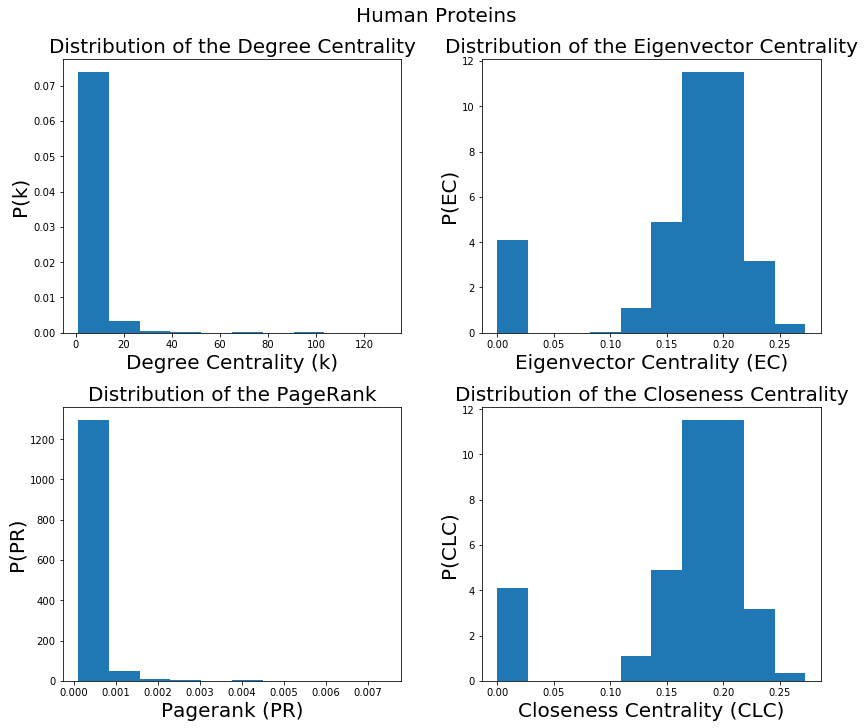

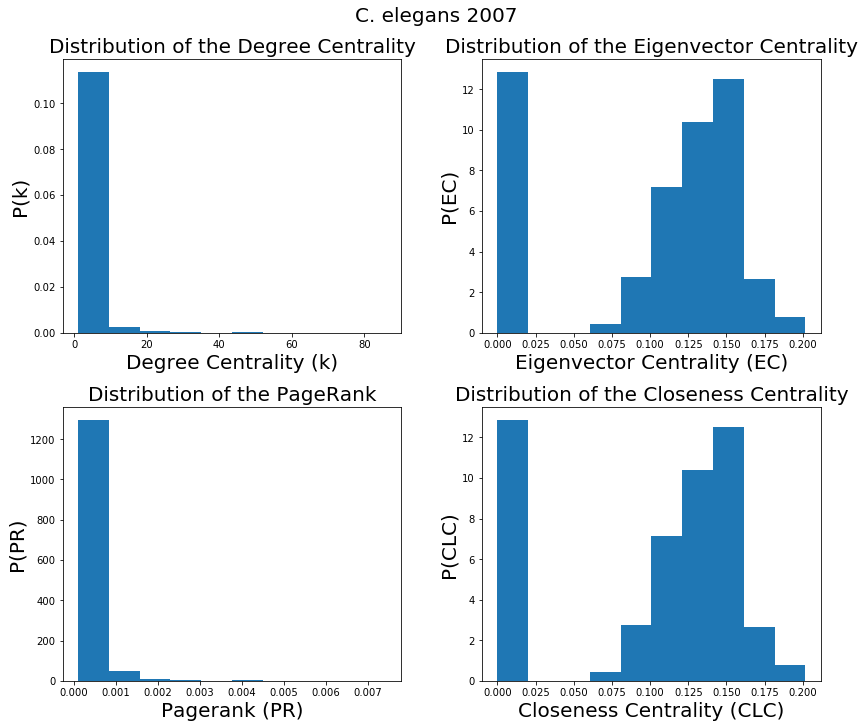

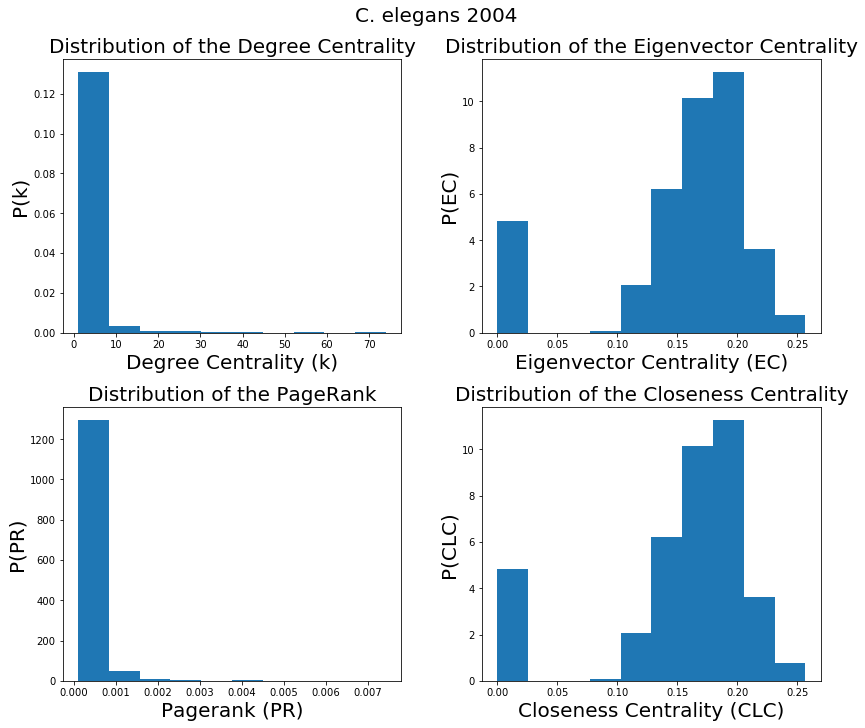

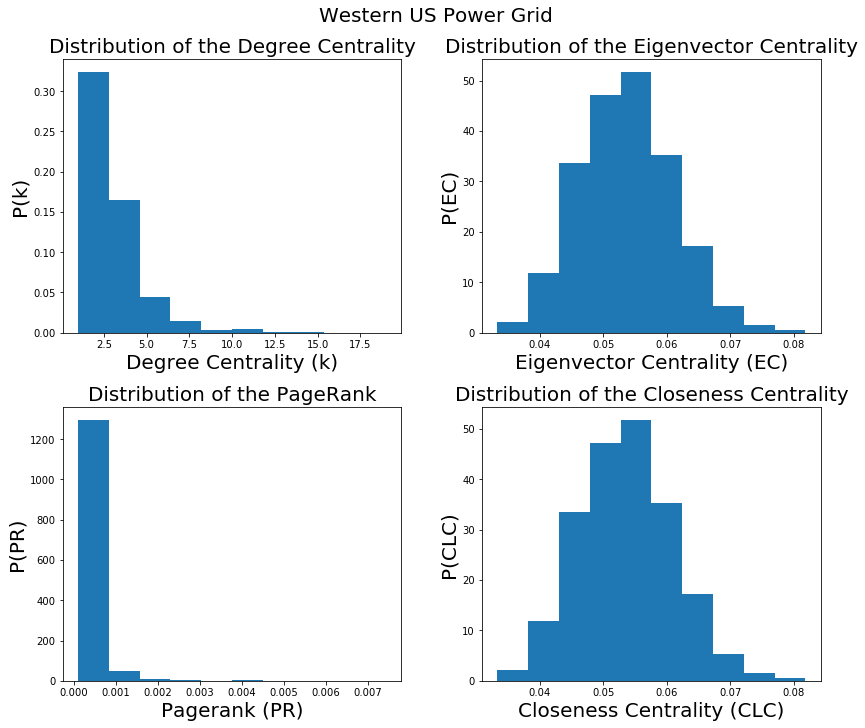

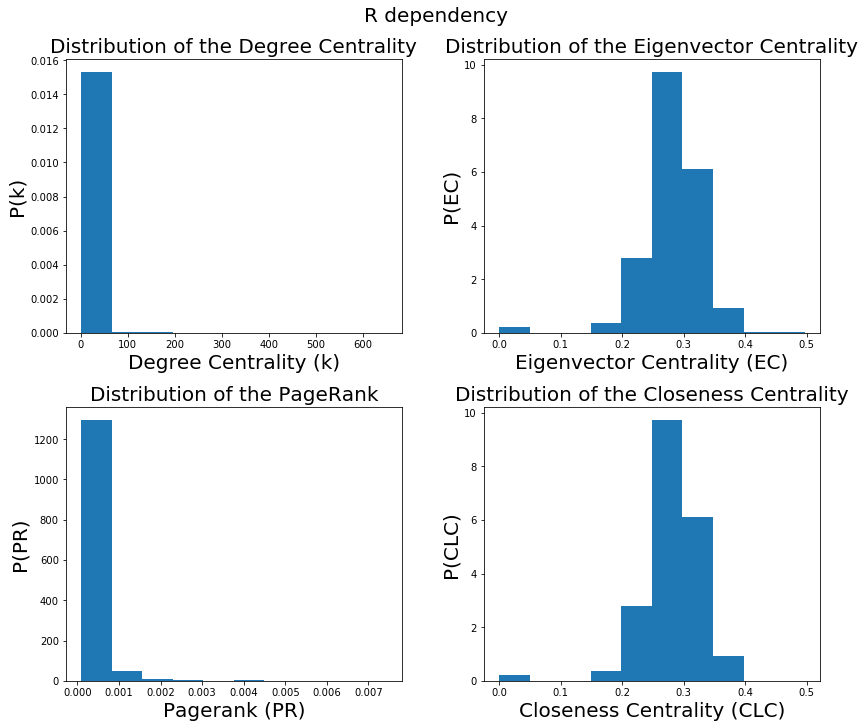

In [334]:
plot_dist(vk_proteins, EC_proteins, PR_proteins, CLC_proteins, "Human Proteins")
plot_dist(vk_elegans07, EC_elegans07, PR_elegans07, CLC_elegans07, "C. elegans 2007")
plot_dist(vk_elegans04, EC_elegans04, PR_elegans04, CLC_elegans04, "C. elegans 2004")
plot_dist(vk_power, EC_power, PR_power, CLC_power, "Western US Power Grid")
plot_dist(vk_Rdep, EC_Rdep, PR_Rdep, CLC_Rdep, "R dependency")

[Voltar para o topo](#lista)

## <a id="4">EX4</a>

[Voltar para o topo](#lista)

## <a id="5">EX5</a>

In [289]:
eroad = nx.Graph()
eroad = nx.read_edgelist('redes/euroad', nodetype=int, comments='%')
eroad = eroad.to_undirected()

elegans = nx.MultiGraph()
elegans = nx.nx.read_gml('redes/celegansneural.gml')
elegans = nx.Graph(elegans)
elegans = elegans.to_undirected()
elegans = nx.convert_node_labels_to_integers(elegans, first_label=0)

airport = nx.Graph()
airport = nx.read_edgelist("redes/USairport500.txt", nodetype=int, data=(('weight',int),))
airport = airport.to_undirected()

proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()

eroad_cc = max(nx.connected_component_subgraphs(eroad), key=len)
elegans_cc = max(nx.connected_component_subgraphs(elegans), key=len)
airport_cc = max(nx.connected_component_subgraphs(airport), key=len)
proteins_cc = max(nx.connected_component_subgraphs(proteins), key=len)

Função que calcula o Knn e plota os dados

In [292]:
def knn(G):
    knn = []
    for i in G.nodes():
        aux =  nx.average_neighbor_degree(G, nodes = [i])
        knn.append(float(aux[i]))
    knn = np.array(knn)
    
    vk = dict(G.degree())
    vk = list(vk.values())
    
    knnk = list()
    ks = list()
    for k in arange(np.min(vk), np.max(vk)):
        aux = vk == k
        if(len(knn[aux]) > 0):
            av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
            knnk.append(av_knn)
            ks.append(k)
            
    return ks, knnk

def plot_knn(ks, knnk):
    plt.plot(ks, knnk, 'ro')
    #plt.loglog(ks,knnk,'bo',basex=10,basey=10)
    #plt.title("Average neighborhood connectivity vs degree")
    plt.ylabel("knn(k)")
    plt.xlabel("k")
    plt.grid(True)
#     plt.savefig('knnk.eps')

    # determine best fit line
    par = np.polyfit(ks, knnk, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(ks), max(ks)]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, '-b')
#     plt.savefig('knn.eps') #save the figure into a file
    plt.show(True)  

### (i) E-Road

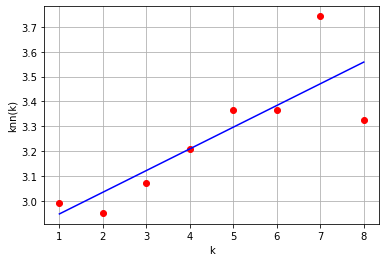

Pearson correlation coefficient: 0.8296047846722235
Assortativity coefficient: 0.09003981380055641


In [295]:
ks, knnk = knn(eroad_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(eroad_cc)
print('Assortativity coefficient:', assort)

### (ii) C. elegans

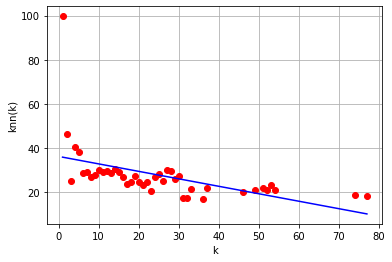

Pearson correlation coefficient: -0.4947811319324024
Assortativity coefficient: -0.16319921031570409


In [296]:
ks, knnk = knn(elegans_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(elegans_cc)
print('Assortativity coefficient:', assort)

### (iii) US Airport

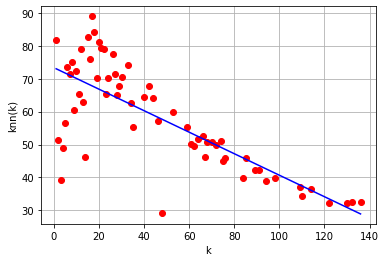

Pearson correlation coefficient: -0.7756491513624391
Assortativity coefficient: -0.26786294344854117


In [297]:
ks, knnk = knn(airport_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(airport_cc)
print('Assortativity coefficient:', assort)

### (iv) Human proteins

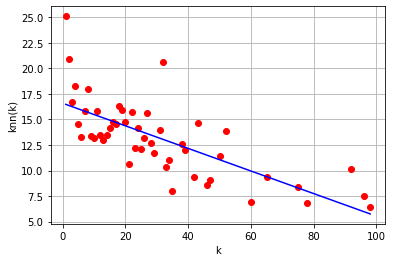

Pearson correlation coefficient: -0.7256770699514126
Assortativity coefficient: -0.12930627529725475


In [298]:
ks, knnk = knn(proteins_cc)
plot_knn(ks, knnk)

rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

assort = nx.degree_assortativity_coefficient(proteins_cc)
print('Assortativity coefficient:', assort)

[Voltar para o topo](#lista)

## <a id="6">EX6</a>

In [387]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k =16
minc = 32
maxc = 32
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

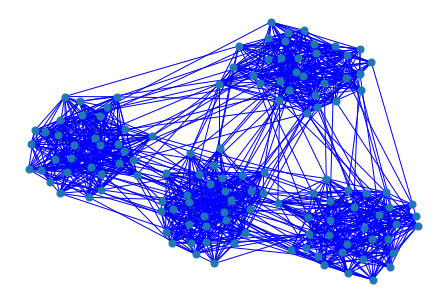

In [388]:
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='r', edge_color='b', 
        node_size=50, font_size=16,  width=1,pos = pos)
plt.show(True)

[Voltar para o topo](#lista)

## <a id="7">EX7</a>

In [343]:
karate = nx.karate_club_graph()
karate = karate.to_undirected()
karate = nx.convert_node_labels_to_integers(karate, first_label=0)

In [362]:
def plot_community(c, title):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(title)
    aux = 0
    for cm in c:
        nx.draw_networkx(karate.subgraph(cm), pos=pos, node_color = colors[aux], 
                         with_labels = False, node_size=150)
        aux = aux + 1
#     plt.show(True)
    return plt

In [377]:
greedy = list(greedy_modularity_communities(karate))

communities = community.centrality.girvan_newman(karate)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
girvan = sorted(map(sorted, next_level_communities))



partition = community_louvain.best_partition(G)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

NameError: name 'community_louvain' is not defined

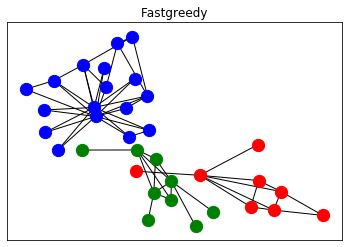

In [363]:
img = plot_community(greedy, "Fastgreedy")
# plot_community(girvan, "Givan Newman")
img.show(True)

[Voltar para o topo](#lista)

## <a id="8">EX8</a>

[Voltar para o topo](#lista)

## <a id="9">EX9</a>

Primeiro temos que ler as redes

In [262]:
eroad = nx.Graph()
eroad = nx.read_edgelist('redes/euroad', nodetype=int, comments='%')
eroad = eroad.to_undirected()

elegans = nx.MultiGraph()
elegans = nx.nx.read_gml('redes/celegansneural.gml')
elegans = nx.Graph(elegans)
elegans = elegans.to_undirected()
elegans = nx.convert_node_labels_to_integers(elegans, first_label=0)

airport = nx.Graph()
airport = nx.read_edgelist("redes/USairport500.txt", nodetype=int, data=(('weight',int),))
airport = airport.to_undirected()

proteins = nx.Graph()
proteins = nx.read_edgelist("redes/human_proteins", nodetype=int, comments='%')
proteins = proteins.to_undirected()

eroad_cc = max(nx.connected_component_subgraphs(eroad), key=len)
elegans_cc = max(nx.connected_component_subgraphs(elegans), key=len)
airport_cc = max(nx.connected_component_subgraphs(airport), key=len)
proteins_cc = max(nx.connected_component_subgraphs(proteins), key=len)

Vamos calcular o número de nós, o grau médio, o coeficiente de assortatividade, e o tamanho médio do menor caminho.

In [263]:
nodes = [len(eroad), len(elegans), len(airport), len(proteins)]

In [271]:
degree = [2*eroad.number_of_edges()/nodes[0], 2*elegans.number_of_edges()/nodes[1], 2*airport.number_of_edges()/nodes[2], 2*proteins.number_of_edges()/nodes[3]]

In [273]:
assort = [nx.degree_assortativity_coefficient(eroad_cc), nx.degree_assortativity_coefficient(elegans_cc), nx.degree_assortativity_coefficient(airport_cc), nx.degree_assortativity_coefficient(proteins_cc)]

In [269]:
av_path = [nx.average_shortest_path_length(eroad_cc), nx.average_shortest_path_length(elegans_cc), nx.average_shortest_path_length(airport_cc), nx.average_shortest_path_length(proteins_cc)]

Antes precisamos criar os arquivos que contem a lista de arestas para serem lidos pelo programa que irá realizar os cálculos

In [286]:
nx.write_edgelist(eroad, "redes/eroad.pairs")
nx.write_edgelist(elegans, "redes/elegans.pairs")
nx.write_edgelist(airport, "redes/airport.pairs")
nx.write_edgelist(proteins, "redes/proteins.pairs")

Vamos agora calcular as modularidades, primeiro pelo método Fastgreedy

In [287]:
str_command1 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'euroad' + '.pairs'
str_command2 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'elegans' + '.pairs'
str_command3 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'airport' + '.pairs'
str_command4 = 'FastCommunity_GPL_v1.0.3/./FastCommunityMH -s -f ' + 'proteins' + '.pairs'

fast = [os.system(str_command1 + ' -l firstRun'), os.system(str_command2 + ' -l firstRun'), os.system(str_command3 + ' -l firstRun'), os.system(str_command4 + ' -l firstRun')]

Com estes resultados obtemos a seguinte tabela:

In [288]:
display(pd.DataFrame({'N': nodes, 'Average Degree': degree, 'Assortativity Coefficient': assort, 'Av. Shortest path': av_path, 'Fastgreedy': fast}, index=['E-road', 'C. Elegans', 'US Airports', 'Human Proteins']))

,N,Average Degree,Assortativity Coefficient,Av. Shortest path,Fastgreedy
E-road,1174,2.413969,0.090040,18.395146,512
C. Elegans,297,14.464646,-0.163199,2.455319,512
US Airports,500,11.920000,-0.267863,2.991030,512
Human Proteins,3133,4.293648,-0.129306,4.839802,512


## EX10